In [1]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv("participants.csv")
df.head()

,holder_id,nome,tipo,depositadas,concedidas,A_depositadas,A_concedidas,B_depositadas,B_concedidas,C_depositadas,...,D_depositadas,D_concedidas,E_depositadas,E_concedidas,F_depositadas,F_concedidas,G_depositadas,G_concedidas,H_depositadas,H_concedidas
0,2,GE OIL GAS UK LIMITED,Company,90,73,0,0,11,11,4,...,0,0,27,26,39,38,12,11,4,4
1,5,ACLARA METERS LLC,Company,13,12,0,0,0,0,0,...,0,0,0,0,0,0,10,10,5,5
2,8,GE AVIATION SYSTEMS LLC,Company,49,14,1,0,7,2,0,...,0,0,0,0,5,2,24,7,14,6
3,10,LEGRAND FRANCE,Company,26,20,0,0,0,0,0,...,0,0,0,0,2,0,0,0,24,20
4,11,LEGRAND SNC,Company,26,20,0,0,0,0,0,...,0,0,0,0,2,0,0,0,24,20


In [3]:
features = df.drop(columns=["nome", "tipo"])
features = features.apply(pd.to_numeric, errors="coerce")
features = features.fillna(0)

In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

In [5]:
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(
        n_clusters=k,
        random_state=42,
        n_init=10
    )
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

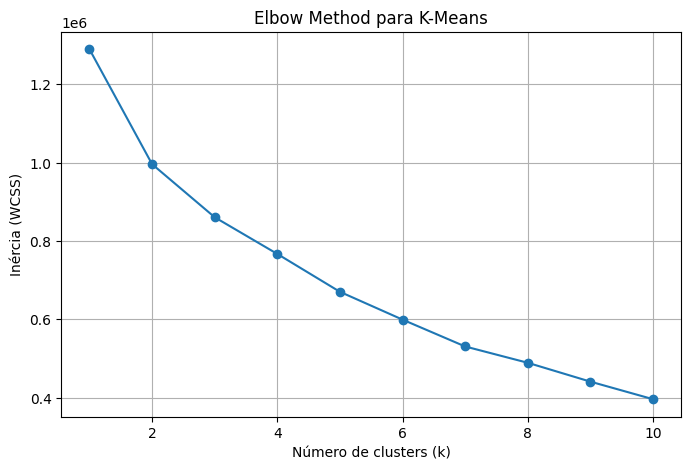

In [6]:
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker="o")
plt.xlabel("Número de clusters (k)")
plt.ylabel("Inércia (WCSS)")
plt.title("Elbow Method para K-Means")
plt.grid(True)
plt.show()

In [7]:
k = 8

kmeans = KMeans(
    n_clusters=k,
    random_state=42,
    n_init=10
)

df["cluster"] = kmeans.fit_predict(X_scaled)

In [8]:
df["cluster"].value_counts().sort_index()

cluster
0    32694
1        1
2      274
3       10
4        2
5        2
6       21
7    34865
Name: count, dtype: int64

In [9]:
cluster_profile = df.groupby("cluster")[features.columns].mean()
cluster_profile

,holder_id,depositadas,concedidas,A_depositadas,A_concedidas,B_depositadas,B_concedidas,C_depositadas,C_concedidas,D_depositadas,D_concedidas,E_depositadas,E_concedidas,F_depositadas,F_concedidas,G_depositadas,G_concedidas,H_depositadas,H_concedidas
cluster,,,,,,,,,,,,,,,,,,,
0,329646.186364,1.511806,0.448645,0.590995,0.160733,0.276748,0.114333,0.322750,0.082859,0.017251,0.007218,0.087141,0.035419,0.112222,0.048908,0.159571,0.044137,0.116321,0.034226
1,79428.000000,5141.000000,1845.000000,22.000000,4.000000,29.000000,8.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,4.000000,3.000000,962.000000,271.000000,4186.000000,1529.000000
2,44480.091241,198.890511,106.018248,47.872263,22.014599,37.879562,24.923358,61.291971,34.554745,6.521898,4.751825,6.350365,4.489051,15.883212,11.186131,24.328467,14.478102,22.605839,13.124088
3,16728.100000,777.400000,544.500000,9.900000,6.000000,339.700000,262.800000,90.000000,64.300000,2.700000,2.600000,32.200000,21.700000,214.100000,169.900000,121.500000,79.700000,100.700000,68.200000
4,2816.500000,1047.500000,682.500000,1.500000,1.000000,24.000000,16.000000,90.500000,50.000000,0.000000,0.000000,732.500000,520.000000,62.500000,47.500000,257.000000,158.500000,26.000000,18.000000
5,9424.500000,2170.500000,1195.000000,367.500000,194.500000,426.000000,260.500000,1425.000000,868.500000,56.500000,40.500000,15.000000,9.000000,35.500000,21.000000,41.500000,14.500000,66.500000,48.000000
6,43100.285714,930.238095,469.380952,444.714286,260.333333,97.047619,59.523810,135.809524,70.666667,15.333333,10.095238,9.333333,4.190476,20.714286,12.476190,121.761905,64.380952,157.142857,59.857143
7,87760.831550,4.138334,1.910569,1.260921,0.556633,0.824523,0.479363,0.946910,0.467862,0.056016,0.033759,0.203155,0.118486,0.359386,0.218070,0.472680,0.215832,0.379492,0.192743


In [10]:
# Outra possibilidade

df = pd.read_csv("participants.csv")
features = df.drop(columns=["nome", "tipo"])
features = features.apply(pd.to_numeric, errors="coerce")
features = features.fillna(0)

df_encoded = pd.get_dummies(df["tipo"], prefix="tipo")
features_ext = pd.concat([features, df_encoded], axis=1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(features_ext)

In [11]:
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(
        n_clusters=k,
        random_state=42,
        n_init=10
    )
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

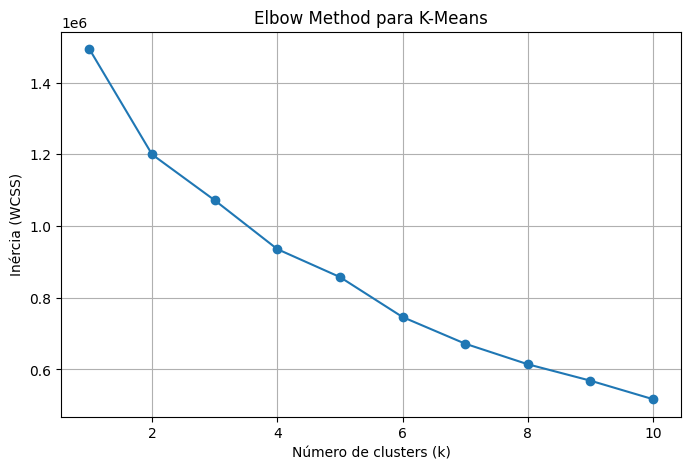

In [12]:
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker="o")
plt.xlabel("Número de clusters (k)")
plt.ylabel("Inércia (WCSS)")
plt.title("Elbow Method para K-Means")
plt.grid(True)
plt.show()

In [13]:
k = 8

kmeans = KMeans(
    n_clusters=k,
    random_state=42,
    n_init=10
)

df["cluster"] = kmeans.fit_predict(X_scaled)

In [14]:
df["cluster"].value_counts().sort_index()

cluster
0    29380
1    35102
2       11
3        2
4        2
5     3346
6       24
7        2
Name: count, dtype: int64

In [15]:
cluster_profile = df.groupby("cluster")[features.columns].mean()
cluster_profile

,holder_id,depositadas,concedidas,A_depositadas,A_concedidas,B_depositadas,B_concedidas,C_depositadas,C_concedidas,D_depositadas,D_concedidas,E_depositadas,E_concedidas,F_depositadas,F_concedidas,G_depositadas,G_concedidas,H_depositadas,H_concedidas
cluster,,,,,,,,,,,,,,,,,,,
0,203142.767937,1.891831,0.675766,0.644044,0.225902,0.401566,0.179408,0.278557,0.108918,0.022464,0.010892,0.137270,0.061334,0.177434,0.086317,0.202246,0.064976,0.121205,0.044656
1,207680.275397,3.412484,1.568201,1.043359,0.440374,0.678765,0.399892,0.843941,0.391117,0.047120,0.027520,0.160304,0.095693,0.293744,0.179306,0.388382,0.178594,0.340550,0.167882
2,15315.818182,752.181818,518.636364,12.454545,5.636364,321.272727,247.545455,82.454545,58.727273,2.454545,2.363636,29.363636,19.727273,207.818182,163.545455,117.090909,75.636364,97.636364,66.272727
3,51307.500000,3983.500000,1395.000000,13.500000,2.500000,21.500000,6.500000,1.000000,0.000000,0.500000,0.000000,1.500000,1.500000,5.000000,3.000000,642.500000,217.500000,3287.500000,1136.500000
4,2816.500000,1047.500000,682.500000,1.500000,1.000000,24.000000,16.000000,90.500000,50.000000,0.000000,0.000000,732.500000,520.000000,62.500000,47.500000,257.000000,158.500000,26.000000,18.000000
5,176645.364913,20.934250,10.145547,5.951584,2.406455,3.660789,2.323670,6.430066,3.262403,0.581590,0.418111,0.599223,0.404363,1.451883,0.991333,2.593246,1.406157,2.280634,1.247161
6,38297.500000,791.750000,422.208333,426.541667,250.458333,91.166667,56.125000,161.750000,88.541667,15.250000,10.083333,8.291667,3.750000,18.875000,11.625000,94.666667,50.208333,38.583333,21.791667
7,9424.500000,2170.500000,1195.000000,367.500000,194.500000,426.000000,260.500000,1425.000000,868.500000,56.500000,40.500000,15.000000,9.000000,35.500000,21.000000,41.500000,14.500000,66.500000,48.000000


In [16]:
cols_tecnologicas = [
    "A_depositadas", "B_depositadas", "C_depositadas",
    "D_depositadas", "E_depositadas", "F_depositadas",
    "G_depositadas", "H_depositadas"
]

for c in sorted(df["cluster"].unique()):
    print(f"\n=== Cluster {c} ===")
    display(
        df[df["cluster"] == c][
            ["nome", "tipo", "concedidas", "depositadas"] + cols_tecnologicas
        ].head(15)
    )


=== Cluster 0 ===


,nome,tipo,concedidas,depositadas,A_depositadas,B_depositadas,C_depositadas,D_depositadas,E_depositadas,F_depositadas,G_depositadas,H_depositadas
23,GUSTAVO HENRIQUE BERNARDE,Person,0,1,0,0,0,0,0,0,0,0
29,FRANCIS RUMENOS PIEDADE,Person,0,1,0,0,0,0,0,0,0,0
33,IVO CECCHIN,Person,0,4,2,0,0,0,0,0,1,0
42,WADI NICOLA MANSOUR,Person,8,11,0,1,0,0,0,1,0,7
49,VICENTE BORGES DA TRINDADE,Person,1,1,0,0,0,0,0,0,0,0
65,ANTONIO LUIZ MARCONDES CYRINEU,Person,0,1,0,0,0,0,0,0,0,0
70,ARMANDO AFFONSO JÚNIOR,Person,0,2,0,1,0,0,0,0,0,0
72,GIOVANI GEREMIA,Person,2,3,0,2,0,0,1,0,0,0
73,MARIELA HAIDÉE ARANDA,Person,1,1,0,1,0,0,0,0,0,0
74,MIGUEL IGNACIO SERRANO,Person,2,3,0,2,0,0,1,0,0,0



=== Cluster 1 ===


,nome,tipo,concedidas,depositadas,A_depositadas,B_depositadas,C_depositadas,D_depositadas,E_depositadas,F_depositadas,G_depositadas,H_depositadas
1,ACLARA METERS LLC,Company,12,13,0,0,0,0,0,0,10,5
2,GE AVIATION SYSTEMS LLC,Company,14,49,1,7,0,0,0,5,24,14
3,LEGRAND FRANCE,Company,20,26,0,0,0,0,0,2,0,24
4,LEGRAND SNC,Company,20,26,0,0,0,0,0,2,0,24
5,AGRIGENETICS INC,Company,8,14,8,0,8,0,0,0,1,0
6,HEC RAST INDUSTRIA COMERCIO E SERVIÇOS AUTOMOT...,Company,0,1,0,0,0,0,0,0,0,0
7,MITSUBA CORPORATION,Company,31,38,0,11,1,0,1,16,0,21
8,HYPRED,Company,2,3,0,1,1,0,0,0,0,0
10,HUGHES NETWORK SYSTEMS LLC,Company,64,161,1,1,0,0,1,1,11,146
12,GRENDENE SA,Company,27,51,31,8,2,0,0,1,1,0



=== Cluster 2 ===


,nome,tipo,concedidas,depositadas,A_depositadas,B_depositadas,C_depositadas,D_depositadas,E_depositadas,F_depositadas,G_depositadas,H_depositadas
37,GENERAL ELECTRIC COMPANY,Company,334,586,17,108,42,0,37,182,106,145
40,MAN TRUCK BUS AG,Company,348,372,1,168,6,0,5,187,31,14
48,HONDA MOTOR CO LTD,Company,772,1076,10,624,16,1,15,338,55,42
58,NIPPON STEEL CORPORATION,Company,613,937,0,314,465,0,41,93,63,152
67,PETRÓLEO BRASILEIRO SA,Company,472,746,8,227,194,2,190,109,134,24
93,SCANIA CV AB,Company,385,669,10,359,6,0,6,331,105,46
358,ROBERT BOSCH GMBH,Person,260,500,38,137,7,0,1,145,73,67
367,THE BOEING COMPANY,Company,843,1099,36,619,47,5,17,119,292,144
1451,TOYOTA JIDOSHA KABUSHIKI KAISHA,Company,634,1050,15,448,73,2,8,279,157,257
17704,SNECMA,Company,540,556,0,184,36,17,0,370,76,7



=== Cluster 3 ===


,nome,tipo,concedidas,depositadas,A_depositadas,B_depositadas,C_depositadas,D_depositadas,E_depositadas,F_depositadas,G_depositadas,H_depositadas
4776,HUAWEI TECHNOLOGIES CO LTD,Company,945,2826,5,14,0,0,3,6,323,2389
17735,QUALCOMM INCORPORATED,Company,1845,5141,22,29,2,1,0,4,962,4186



=== Cluster 4 ===


,nome,tipo,concedidas,depositadas,A_depositadas,B_depositadas,C_depositadas,D_depositadas,E_depositadas,F_depositadas,G_depositadas,H_depositadas
773,HALLIBURTON ENERGY SERVICES INC,Person,732,1360,2,20,135,0,988,77,305,34
832,BAKER HUGHES INCORPORATED,Person,633,735,1,28,46,0,477,48,209,18



=== Cluster 5 ===


,nome,tipo,concedidas,depositadas,A_depositadas,B_depositadas,C_depositadas,D_depositadas,E_depositadas,F_depositadas,G_depositadas,H_depositadas
0,GE OIL GAS UK LIMITED,Company,73,90,0,11,4,0,27,39,12,4
9,INSTITUTO FEDERAL DE EDUACAÇÃO CIÊNCIA E TECNO...,Institution,1,2,0,0,0,0,0,0,0,0
11,IFP ENERGIES NOUVELLES,Company,191,300,0,118,194,3,20,19,21,1
17,SUMITOMO CHEMICAL COMPANY LIMITED,Company,174,307,215,13,131,1,0,1,2,0
19,NIPPON STEEL SUMITOMO METAL CORPORATION,Company,235,366,0,146,197,0,7,44,25,20
21,ELECTROLUX DO BRASIL SA,Company,69,103,10,6,3,24,5,51,5,6
22,MESSIERBUGATTIDOWTY,Company,64,70,0,60,1,3,1,10,5,4
25,CENTRO DE PESQUISA E DESENVOLVIMENTO EM TELECO...,Institution,129,252,3,5,1,0,1,2,112,137
27,PGS GEOPHYSICAL AS,Company,135,186,2,12,1,0,0,0,140,1
34,INSTITUTO NACIONAL DE TECNOLOGIA INDUSTRIAL,Institution,0,1,0,0,0,0,0,0,0,0



=== Cluster 6 ===


,nome,tipo,concedidas,depositadas,A_depositadas,B_depositadas,C_depositadas,D_depositadas,E_depositadas,F_depositadas,G_depositadas,H_depositadas
18,DOW AGROSCIENCES LLC,Company,278,512,253,6,173,0,0,0,5,0
24,CNH INDUSTRIAL AMERICA LLC,Company,483,845,609,149,0,0,40,82,56,7
68,UNIVERSIDADE ESTADUAL DE CAMPINAS,Institution,549,950,307,132,272,9,10,19,197,72
69,UNIVERSIDADE DE SÃO PAULO,Institution,615,1036,408,155,259,11,12,28,174,40
71,UNIVERSIDADE FEDERAL DE MINAS GERAIS,Institution,467,1041,456,146,414,11,8,21,203,23
84,ETHICON ENDO,Company,376,428,365,6,2,0,0,4,4,8
99,DEERE COMPANY,Company,667,1370,719,295,5,0,89,166,198,87
183,ROHM AND HAAS COMPANY,Company,436,754,93,111,530,14,4,2,13,11
1630,M INNOVATIVE PROPERTIES COMPANY,Company,324,794,248,213,177,28,22,21,89,59
3052,LOREAL,Company,474,711,577,21,51,1,3,0,5,1



=== Cluster 7 ===


,nome,tipo,concedidas,depositadas,A_depositadas,B_depositadas,C_depositadas,D_depositadas,E_depositadas,F_depositadas,G_depositadas,H_depositadas
338,DOW GLOBAL TECHNOLOGIES LLC,Company,1377,2259,148,543,1570,63,20,26,38,115
3762,BASF SE,Company,1013,2082,587,309,1280,50,10,45,45,18


In [ ]:
output_dir = "clusters"

for c in sorted(df["cluster"].unique()):
    cluster_df = df[df["cluster"] == c]

    file_path = os.path.join(output_dir, f"cluster_{c}.csv")

    cluster_df.to_csv(
        file_path,
        index=False,
        encoding="utf-8"
    )

    print(f"Arquivo gerado: {file_path} ({len(cluster_df)} registros)")

,nome,tipo,num_colaboradores,is_foreign,concedidas,depositadas,A_depositadas,B_depositadas,C_depositadas,D_depositadas,E_depositadas,F_depositadas,G_depositadas,H_depositadas
11,IFP ENERGIES NOUVELLES,Company,39,1,191,300,0,118,194,3,20,19,21,1
17,SUMITOMO CHEMICAL COMPANY LIMITED,Company,18,1,174,307,215,13,131,1,0,1,2,0
18,DOW AGROSCIENCES LLC,Company,28,1,278,512,253,6,173,0,0,0,5,0
19,NIPPON STEEL SUMITOMO METAL CORPORATION,Company,25,1,235,366,0,146,197,0,7,44,25,20
24,CNH INDUSTRIAL AMERICA LLC,Company,18,1,483,845,609,149,0,0,40,82,56,7
37,GENERAL ELECTRIC COMPANY,Company,72,1,334,586,17,108,42,0,37,182,106,145
44,UNIVERSIDADE FEDERAL DE UBERLÂNDIA,Institution,63,0,109,304,107,62,88,0,7,8,99,31
45,FUNDAÇÃO DE AMPARO A PESQUISA DO ESTADO DE MIN...,Institution,115,0,200,486,198,58,154,2,4,7,72,24
60,VALE SA,Company,30,0,137,214,7,103,47,1,20,19,50,6
66,UNIVERSIDADE FEDERAL DO RIO GRANDE DO SUL,Institution,110,0,223,439,110,76,139,8,5,19,55,16


Arquivo gerado: clusters\cluster_0.csv (111 registros)


,nome,tipo,num_colaboradores,is_foreign,concedidas,depositadas,A_depositadas,B_depositadas,C_depositadas,D_depositadas,E_depositadas,F_depositadas,G_depositadas,H_depositadas
0,GE OIL GAS UK LIMITED,Company,6,1,73,90,0,11,4,0,27,39,12,4
1,ACLARA METERS LLC,Company,0,1,12,13,0,0,0,0,0,0,10,5
2,GE AVIATION SYSTEMS LLC,Company,0,1,14,49,1,7,0,0,0,5,24,14
3,LEGRAND FRANCE,Company,3,1,20,26,0,0,0,0,0,2,0,24
4,LEGRAND SNC,Company,3,1,20,26,0,0,0,0,0,2,0,24
5,AGRIGENETICS INC,Company,1,1,8,14,8,0,8,0,0,0,1,0
6,HEC RAST INDUSTRIA COMERCIO E SERVIÇOS AUTOMOT...,Company,0,0,0,1,0,0,0,0,0,0,0,0
7,MITSUBA CORPORATION,Company,4,1,31,38,0,11,1,0,1,16,0,21
8,HYPRED,Company,6,1,2,3,0,1,1,0,0,0,0,0
9,INSTITUTO FEDERAL DE EDUACAÇÃO CIÊNCIA E TECNO...,Institution,0,0,1,2,0,0,0,0,0,0,0,0


Arquivo gerado: clusters\cluster_1.csv (38340 registros)


,nome,tipo,num_colaboradores,is_foreign,concedidas,depositadas,A_depositadas,B_depositadas,C_depositadas,D_depositadas,E_depositadas,F_depositadas,G_depositadas,H_depositadas
23,GUSTAVO HENRIQUE BERNARDE,Person,0,0,0,1,0,0,0,0,0,0,0,0
29,FRANCIS RUMENOS PIEDADE,Person,0,0,0,1,0,0,0,0,0,0,0,0
33,IVO CECCHIN,Person,0,0,0,4,2,0,0,0,0,0,1,0
42,WADI NICOLA MANSOUR,Person,0,0,8,11,0,1,0,0,0,1,0,7
49,VICENTE BORGES DA TRINDADE,Person,0,0,1,1,0,0,0,0,0,0,0,0
65,ANTONIO LUIZ MARCONDES CYRINEU,Person,0,0,0,1,0,0,0,0,0,0,0,0
70,ARMANDO AFFONSO JÚNIOR,Person,3,0,0,2,0,1,0,0,0,0,0,0
72,GIOVANI GEREMIA,Person,5,0,2,3,0,2,0,0,1,0,0,0
73,MARIELA HAIDÉE ARANDA,Person,2,0,1,1,0,1,0,0,0,0,0,0
74,MIGUEL IGNACIO SERRANO,Person,5,0,2,3,0,2,0,0,1,0,0,0


Arquivo gerado: clusters\cluster_2.csv (29402 registros)


,nome,tipo,num_colaboradores,is_foreign,concedidas,depositadas,A_depositadas,B_depositadas,C_depositadas,D_depositadas,E_depositadas,F_depositadas,G_depositadas,H_depositadas
773,HALLIBURTON ENERGY SERVICES INC,Person,93,1,732,1360,2,20,135,0,988,77,305,34
832,BAKER HUGHES INCORPORATED,Person,38,1,633,735,1,28,46,0,477,48,209,18


Arquivo gerado: clusters\cluster_3.csv (2 registros)


,nome,tipo,num_colaboradores,is_foreign,concedidas,depositadas,A_depositadas,B_depositadas,C_depositadas,D_depositadas,E_depositadas,F_depositadas,G_depositadas,H_depositadas
4776,HUAWEI TECHNOLOGIES CO LTD,Company,58,1,945,2826,5,14,0,0,3,6,323,2389
17735,QUALCOMM INCORPORATED,Company,8,1,1845,5141,22,29,2,1,0,4,962,4186


Arquivo gerado: clusters\cluster_4.csv (2 registros)


,nome,tipo,num_colaboradores,is_foreign,concedidas,depositadas,A_depositadas,B_depositadas,C_depositadas,D_depositadas,E_depositadas,F_depositadas,G_depositadas,H_depositadas
40,MAN TRUCK BUS AG,Company,27,1,348,372,1,168,6,0,5,187,31,14
48,HONDA MOTOR CO LTD,Company,171,1,772,1076,10,624,16,1,15,338,55,42
58,NIPPON STEEL CORPORATION,Company,47,1,613,937,0,314,465,0,41,93,63,152
67,PETRÓLEO BRASILEIRO SA,Company,97,0,472,746,8,227,194,2,190,109,134,24
93,SCANIA CV AB,Company,36,1,385,669,10,359,6,0,6,331,105,46
99,DEERE COMPANY,Company,131,1,667,1370,719,295,5,0,89,166,198,87
338,DOW GLOBAL TECHNOLOGIES LLC,Company,267,1,1377,2259,148,543,1570,63,20,26,38,115
367,THE BOEING COMPANY,Company,60,1,843,1099,36,619,47,5,17,119,292,144
1451,TOYOTA JIDOSHA KABUSHIKI KAISHA,Company,188,1,634,1050,15,448,73,2,8,279,157,257
3762,BASF SE,Company,206,1,1013,2082,587,309,1280,50,10,45,45,18


Arquivo gerado: clusters\cluster_5.csv (12 registros)


In [18]:
df = pd.read_csv("participants_enriched.csv")
df.head()

,holder_id,nome,tipo,depositadas,concedidas,A_depositadas,A_concedidas,B_depositadas,B_concedidas,C_depositadas,...,E_depositadas,E_concedidas,F_depositadas,F_concedidas,G_depositadas,G_concedidas,H_depositadas,H_concedidas,num_colaboradores,is_foreign
0,2,GE OIL GAS UK LIMITED,Company,90,73,0,0,11,11,4,...,27,26,39,38,12,11,4,4,6,1
1,5,ACLARA METERS LLC,Company,13,12,0,0,0,0,0,...,0,0,0,0,10,10,5,5,0,1
2,8,GE AVIATION SYSTEMS LLC,Company,49,14,1,0,7,2,0,...,0,0,5,2,24,7,14,6,0,1
3,10,LEGRAND FRANCE,Company,26,20,0,0,0,0,0,...,0,0,2,0,0,0,24,20,3,1
4,11,LEGRAND SNC,Company,26,20,0,0,0,0,0,...,0,0,2,0,0,0,24,20,3,1


In [19]:
features = df.drop(columns=["nome", "tipo"])
features = features.apply(pd.to_numeric, errors="coerce")
features = features.fillna(0)

df_encoded = pd.get_dummies(df["tipo"], prefix="tipo")
features_ext = pd.concat([features, df_encoded], axis=1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(features_ext)

In [20]:
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(
        n_clusters=k,
        random_state=42,
        n_init=10
    )
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

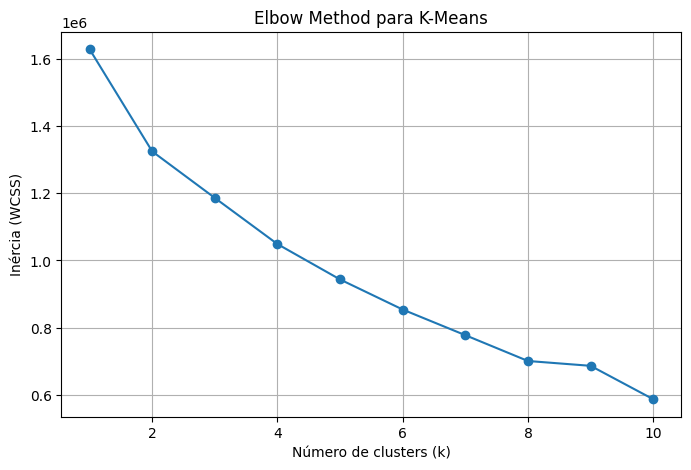

In [21]:
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker="o")
plt.xlabel("Número de clusters (k)")
plt.ylabel("Inércia (WCSS)")
plt.title("Elbow Method para K-Means")
plt.grid(True)
plt.show()

In [22]:
k = 6

kmeans = KMeans(
    n_clusters=k,
    random_state=42,
    n_init=10
)

df["cluster"] = kmeans.fit_predict(X_scaled)

In [23]:
df["cluster"].value_counts().sort_index()

cluster
0      111
1    38340
2    29402
3        2
4        2
5       12
Name: count, dtype: int64

In [24]:
cluster_profile = df.groupby("cluster")[features.columns].mean()
cluster_profile

,holder_id,depositadas,concedidas,A_depositadas,A_concedidas,B_depositadas,B_concedidas,C_depositadas,C_concedidas,D_depositadas,...,E_depositadas,E_concedidas,F_depositadas,F_concedidas,G_depositadas,G_concedidas,H_depositadas,H_concedidas,num_colaboradores,is_foreign
cluster,,,,,,,,,,,,,,,,,,,,,
0,43237.756757,416.000000,217.522523,151.783784,80.891892,58.711712,37.675676,124.522523,67.990991,10.315315,...,3.972973,2.477477,16.747748,11.387387,51.360360,29.009009,45.648649,26.585586,57.396396,0.846847
1,205422.403417,4.166667,1.926500,1.255190,0.518779,0.817684,0.490115,1.049609,0.490610,0.070736,...,0.191341,0.117893,0.355764,0.223213,0.486124,0.232316,0.405373,0.201461,1.033307,0.784168
2,203034.103802,1.979627,0.710870,0.682301,0.235936,0.413033,0.187062,0.312394,0.123699,0.026155,...,0.137270,0.061356,0.186960,0.093259,0.209714,0.067240,0.122033,0.044861,0.946772,0.393647
3,2816.500000,1047.500000,682.500000,1.500000,1.000000,24.000000,16.000000,90.500000,50.000000,0.000000,...,732.500000,520.000000,62.500000,47.500000,257.000000,158.500000,26.000000,18.000000,65.500000,1.000000
4,51307.500000,3983.500000,1395.000000,13.500000,2.500000,21.500000,6.500000,1.000000,0.000000,0.500000,...,1.500000,1.500000,5.000000,3.000000,642.500000,217.500000,3287.500000,1136.500000,33.000000,1.000000
5,15528.750000,1074.916667,680.666667,128.000000,66.916667,369.666667,266.750000,309.416667,196.583333,11.666667,...,33.666667,20.000000,183.000000,141.916667,115.833333,70.416667,90.166667,61.000000,113.666667,0.916667


In [25]:
cols_tecnologicas = [
    "A_depositadas", "B_depositadas", "C_depositadas",
    "D_depositadas", "E_depositadas", "F_depositadas",
    "G_depositadas", "H_depositadas"
]

for c in sorted(df["cluster"].unique()):
    print(f"\n=== Cluster {c} ===")
    display(
        df[df["cluster"] == c][
            ["nome", "tipo", "num_colaboradores", "is_foreign", "concedidas", "depositadas"] + cols_tecnologicas
        ].head(15)
    )


=== Cluster 0 ===


,nome,tipo,num_colaboradores,is_foreign,concedidas,depositadas,A_depositadas,B_depositadas,C_depositadas,D_depositadas,E_depositadas,F_depositadas,G_depositadas,H_depositadas
11,IFP ENERGIES NOUVELLES,Company,39,1,191,300,0,118,194,3,20,19,21,1
17,SUMITOMO CHEMICAL COMPANY LIMITED,Company,18,1,174,307,215,13,131,1,0,1,2,0
18,DOW AGROSCIENCES LLC,Company,28,1,278,512,253,6,173,0,0,0,5,0
19,NIPPON STEEL SUMITOMO METAL CORPORATION,Company,25,1,235,366,0,146,197,0,7,44,25,20
24,CNH INDUSTRIAL AMERICA LLC,Company,18,1,483,845,609,149,0,0,40,82,56,7
37,GENERAL ELECTRIC COMPANY,Company,72,1,334,586,17,108,42,0,37,182,106,145
44,UNIVERSIDADE FEDERAL DE UBERLÂNDIA,Institution,63,0,109,304,107,62,88,0,7,8,99,31
45,FUNDAÇÃO DE AMPARO A PESQUISA DO ESTADO DE MIN...,Institution,115,0,200,486,198,58,154,2,4,7,72,24
60,VALE SA,Company,30,0,137,214,7,103,47,1,20,19,50,6
66,UNIVERSIDADE FEDERAL DO RIO GRANDE DO SUL,Institution,110,0,223,439,110,76,139,8,5,19,55,16



=== Cluster 1 ===


,nome,tipo,num_colaboradores,is_foreign,concedidas,depositadas,A_depositadas,B_depositadas,C_depositadas,D_depositadas,E_depositadas,F_depositadas,G_depositadas,H_depositadas
0,GE OIL GAS UK LIMITED,Company,6,1,73,90,0,11,4,0,27,39,12,4
1,ACLARA METERS LLC,Company,0,1,12,13,0,0,0,0,0,0,10,5
2,GE AVIATION SYSTEMS LLC,Company,0,1,14,49,1,7,0,0,0,5,24,14
3,LEGRAND FRANCE,Company,3,1,20,26,0,0,0,0,0,2,0,24
4,LEGRAND SNC,Company,3,1,20,26,0,0,0,0,0,2,0,24
5,AGRIGENETICS INC,Company,1,1,8,14,8,0,8,0,0,0,1,0
6,HEC RAST INDUSTRIA COMERCIO E SERVIÇOS AUTOMOT...,Company,0,0,0,1,0,0,0,0,0,0,0,0
7,MITSUBA CORPORATION,Company,4,1,31,38,0,11,1,0,1,16,0,21
8,HYPRED,Company,6,1,2,3,0,1,1,0,0,0,0,0
9,INSTITUTO FEDERAL DE EDUACAÇÃO CIÊNCIA E TECNO...,Institution,0,0,1,2,0,0,0,0,0,0,0,0



=== Cluster 2 ===


,nome,tipo,num_colaboradores,is_foreign,concedidas,depositadas,A_depositadas,B_depositadas,C_depositadas,D_depositadas,E_depositadas,F_depositadas,G_depositadas,H_depositadas
23,GUSTAVO HENRIQUE BERNARDE,Person,0,0,0,1,0,0,0,0,0,0,0,0
29,FRANCIS RUMENOS PIEDADE,Person,0,0,0,1,0,0,0,0,0,0,0,0
33,IVO CECCHIN,Person,0,0,0,4,2,0,0,0,0,0,1,0
42,WADI NICOLA MANSOUR,Person,0,0,8,11,0,1,0,0,0,1,0,7
49,VICENTE BORGES DA TRINDADE,Person,0,0,1,1,0,0,0,0,0,0,0,0
65,ANTONIO LUIZ MARCONDES CYRINEU,Person,0,0,0,1,0,0,0,0,0,0,0,0
70,ARMANDO AFFONSO JÚNIOR,Person,3,0,0,2,0,1,0,0,0,0,0,0
72,GIOVANI GEREMIA,Person,5,0,2,3,0,2,0,0,1,0,0,0
73,MARIELA HAIDÉE ARANDA,Person,2,0,1,1,0,1,0,0,0,0,0,0
74,MIGUEL IGNACIO SERRANO,Person,5,0,2,3,0,2,0,0,1,0,0,0



=== Cluster 3 ===


,nome,tipo,num_colaboradores,is_foreign,concedidas,depositadas,A_depositadas,B_depositadas,C_depositadas,D_depositadas,E_depositadas,F_depositadas,G_depositadas,H_depositadas
773,HALLIBURTON ENERGY SERVICES INC,Person,93,1,732,1360,2,20,135,0,988,77,305,34
832,BAKER HUGHES INCORPORATED,Person,38,1,633,735,1,28,46,0,477,48,209,18



=== Cluster 4 ===


,nome,tipo,num_colaboradores,is_foreign,concedidas,depositadas,A_depositadas,B_depositadas,C_depositadas,D_depositadas,E_depositadas,F_depositadas,G_depositadas,H_depositadas
4776,HUAWEI TECHNOLOGIES CO LTD,Company,58,1,945,2826,5,14,0,0,3,6,323,2389
17735,QUALCOMM INCORPORATED,Company,8,1,1845,5141,22,29,2,1,0,4,962,4186



=== Cluster 5 ===


,nome,tipo,num_colaboradores,is_foreign,concedidas,depositadas,A_depositadas,B_depositadas,C_depositadas,D_depositadas,E_depositadas,F_depositadas,G_depositadas,H_depositadas
40,MAN TRUCK BUS AG,Company,27,1,348,372,1,168,6,0,5,187,31,14
48,HONDA MOTOR CO LTD,Company,171,1,772,1076,10,624,16,1,15,338,55,42
58,NIPPON STEEL CORPORATION,Company,47,1,613,937,0,314,465,0,41,93,63,152
67,PETRÓLEO BRASILEIRO SA,Company,97,0,472,746,8,227,194,2,190,109,134,24
93,SCANIA CV AB,Company,36,1,385,669,10,359,6,0,6,331,105,46
99,DEERE COMPANY,Company,131,1,667,1370,719,295,5,0,89,166,198,87
338,DOW GLOBAL TECHNOLOGIES LLC,Company,267,1,1377,2259,148,543,1570,63,20,26,38,115
367,THE BOEING COMPANY,Company,60,1,843,1099,36,619,47,5,17,119,292,144
1451,TOYOTA JIDOSHA KABUSHIKI KAISHA,Company,188,1,634,1050,15,448,73,2,8,279,157,257
3762,BASF SE,Company,206,1,1013,2082,587,309,1280,50,10,45,45,18
